<a href="https://colab.research.google.com/github/tcglarry/foryuan_zhi/blob/master/ForYuan_zhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

!ls

pima-indians-diabetes_data.csv	pima-indians-diabetes.data.csv	sample_data


# New Section

In [68]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
# load data
dataset = pd.read_csv('diabetes.csv')


FileNotFoundError: ignored

In [45]:
dataset[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
data_set = dataset.values

In [38]:
# split data into X and y
X = data_set[:,0:8]
Y = data_set[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.84      0.83       162
        1.0       0.70      0.67      0.69        92

avg / total       0.78      0.78      0.78       254



In [55]:
predictions_03 = model.predict_proba(X_test)[:,1] > 0.3
accuracy = accuracy_score(y_test, predictions_03)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print (classification_report(y_test,predictions_03))

Accuracy: 73.23%


             precision    recall  f1-score   support

        0.0       0.87      0.69      0.77       162
        1.0       0.60      0.82      0.69        92

avg / total       0.77      0.73      0.74       254



In [52]:
from sklearn import metrics
pred_prob = model.predict_proba(X_test)[:,1]
print (pred_prob.shape)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
print (metrics.auc(fpr,tpr))

(254,)
0.8211889425657541


In [35]:
from sklearn.svm import SVC
gbc =  SVC()
gbc.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_pred = gbc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.78%


In [34]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.73      0.83      0.77       162
        1.0       0.60      0.46      0.52        92

avg / total       0.68      0.69      0.68       254



In [0]:

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img

from keras.layers import Dense, GlobalAveragePooling2D

from keras.applications.xception import Xception, preprocess_input

import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import subprocess
import os
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd
import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback
from keras.applications.mobilenet import MobileNet
from keras.applications.nasnet import NASNetMobile,NASNetLarge
import matplotlib.image as mpimg
from skimage import io
from xgboost.sklearn import XGBClassifier

In [3]:

y =  np.load('Y.npy')
y.shape

(2062, 10)

In [40]:
y[-5:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [44]:
X= np.load('X.npy')
X= X[:,:,:,np.newaxis]
X.shape

(2062, 64, 64, 1)

In [45]:
X = np.concatenate([X,X,X],axis=-1)
X.shape

(2062, 64, 64, 3)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print (X_train.shape)
print (X_test.shape)

(1443, 64, 64, 3)
(619, 64, 64, 3)


(2062, 64, 64, 3)

In [0]:

def conv_block(ch, activation= 'relu', padding='same',kernel_regularizer=regularizers.l2(0.01)):       
    return Conv2D(ch,(3,3),activation= activation, padding =padding )


def build_model(ch=32):
    #inputs = Input((IMAGE_HEIGHT,IMAGE_WIDTH,ch))
    inputs = Input((64,64,1))

    x = Conv2D(32,(2,2),padding='valid')(inputs)
 
    x =  conv_block(ch)(x)
    x = conv_block(ch)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*2)(x)
    x = conv_block(ch*2)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*4)(x)
    x = conv_block(ch*4)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*8)(x)
    x = conv_block(ch*8)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x= GlobalAveragePooling2D()(x)
    
    x = Dense (128, activation = 'relu' )(x)
    
    x = Dense (32, activation = 'relu' )(x)
    
    output = Dense(10,activation = 'softmax')(x)
    
    model = Model(inputs= inputs, outputs=output)
    
    model.summary()
    
    return model
    

In [0]:

def build_model_2():
    inputs = Input(shape=(64,64,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.layers[-2].output
    
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(32,activation='relu')(x)
    x = Dropout(0.3)(x)
    
    output = Dense(10,activation = 'softmax')(x)
    
 
    model = Model(inputs=base_model.input, outputs=output)
    model.summary()
    
    return model

In [58]:
model = build_model_2()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 70, 70, 3)    0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
model.compile (optimizer='Adam', loss = ['categorical_crossentropy'], metrics =['acc'])


In [60]:

checkpoint = ModelCheckpoint(filepath='water_first_try_2_prepro_ch64_gram.h5', monitor = 'val_loss', save_best_only=True, mode= 'auto')
earlystop = EarlyStopping(patience=10)
callback_list = [checkpoint, earlystop]
model.fit(x=X_train, y=y_train, batch_size=32, epochs=300, callbacks = callback_list, verbose=1, validation_split=0.2,  shuffle=True)


Train on 1154 samples, validate on 289 samples
Epoch 1/300
1154/1154 [==============================] - 41s 35ms/step - loss: 1.6837 - acc: 0.4601 - val_loss: 3.0087 - val_acc: 0.4775
Epoch 2/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.8472 - acc: 0.7253 - val_loss: 1.1704 - val_acc: 0.7578
Epoch 3/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.5054 - acc: 0.8354 - val_loss: 1.0903 - val_acc: 0.7716
Epoch 4/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.4238 - acc: 0.8891 - val_loss: 3.6413 - val_acc: 0.4913
Epoch 5/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.2378 - acc: 0.9324 - val_loss: 0.7554 - val_acc: 0.8616
Epoch 6/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.1781 - acc: 0.9636 - val_loss: 1.2918 - val_acc: 0.8339
Epoch 7/300
1154/1154 [==============================] - 10s 9ms/step - loss: 0.2643 - acc: 0.9428 - val_loss: 8.4429 - val_acc: 0.3772


In [61]:
model.evaluate(X_test,y_test)

619/619 [==============================] - 1s 2ms/step


[1.239498024418204, 0.8594507268827065]

In [75]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions,axis=1)
predictions.shape


(619,)

In [78]:
np.argmax(y_test,axis=1).shape

(619,)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(np.argmax(y_test,axis=1), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print (classification_report(np.argmax(y_test,axis=1),predictions))

Accuracy: 85.95%
             precision    recall  f1-score   support

          0       1.00      0.78      0.88        68
          1       1.00      0.89      0.94        57
          2       0.47      1.00      0.64        62
          3       0.98      0.88      0.93        58
          4       1.00      0.89      0.94        55
          5       0.97      0.45      0.61        74
          6       0.98      0.89      0.93        55
          7       0.85      0.98      0.91        62
          8       0.96      0.94      0.95        70
          9       1.00      0.98      0.99        58

avg / total       0.92      0.86      0.87       619



In [0]:
class_names = [i for i in range (10)]

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):


    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    """
    
    print(cm)
    print ('\n\n')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    '''
    labels = classes
    #cm = confusion_matrix(y_test, pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    '''
 

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[53  0 10  0  0  0  0  5  0  0]
 [ 0 51  5  0  0  0  0  1  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  3 51  0  0  1  1  2  0]
 [ 0  0  5  0 49  1  0  0  0  0]
 [ 0  0 41  0  0 33  0  0  0  0]
 [ 0  0  5  1  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 61  1  0]
 [ 0  0  1  0  0  0  0  3 66  0]
 [ 0  0  0  0  0  0  0  1  0 57]]



Normalized confusion matrix


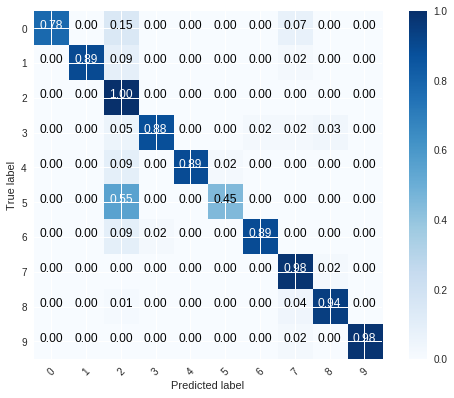

In [88]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(np.argmax(y_test,axis=1), predictions)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)


In [89]:
print (classification_report(np.argmax(y_test,axis=1),predictions))

             precision    recall  f1-score   support

          0       1.00      0.78      0.88        68
          1       1.00      0.89      0.94        57
          2       0.47      1.00      0.64        62
          3       0.98      0.88      0.93        58
          4       1.00      0.89      0.94        55
          5       0.97      0.45      0.61        74
          6       0.98      0.89      0.93        55
          7       0.85      0.98      0.91        62
          8       0.96      0.94      0.95        70
          9       1.00      0.98      0.99        58

avg / total       0.92      0.86      0.87       619

